# EDA: King County Housing Market 2014-2015

This notebook provides an explorative data analysis of house sales in King County from 2014 to 2015. It consists of two parts:

1. A classical EDA focusing on data quality and descriptive statistics.
2. A client-focused analysis that helps a client in making an investment decision.

## Setup

We start by loading the following Python packages:

1. Pandas for operations on dataframes.
2. Numpy for NaN handling.
3. Seaborn for plotting.
4. Missingo to visualize missing values.
5. Folium for geoplots.

In [78]:
# Importing packages and setup
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium

# Plotting settings
plt.rcParams.update({ "figure.figsize" : (16, 8),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
#plt.rcParams["figure.facecolor"]= "w"
sns.set_theme(context='notebook', style='darkgrid')
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

## Data Exploration

Our data consists of 21597 observations and 22 columns:

| **Attribute** | **Description** |
| --- | --- |
| id | Unique identifier for a house |
| date | Date house was sold |
| price| Prediction target (house price) |
| bedrooms | Number of bedrooms in the house |
| bathrooms| Number of bathrooms in the house |
| sqft_living | Footage of the home |
| sqft_lot | Footage of the lot |
| floors | Total number of floors in the house |
| waterfront | Whether the house has a waterfront view |
| view | Quality of the view |
| condition | Overall condition of the house |
| grade | Overall grade given to the housing unit (King County grading system) |
| sqft_above | Square footage of the house above basement |
| sqft_basement | Square footage of the basement |
| yr_built | Build year of the house |
| yr_renovated | Year when the house was renovated |
| zipcode | Zip code of the house location |
| lat | Latitude coordinate of the house location |
| long | Longitude coordinate of the house location |
| sqft_living15| Square footage of interior living space for nearest 15 neighbors |
| sqft_lot15 | Footage of land lots for nearest 15 neighbors |

Below, we take a first look at missing values and the data type of each column.

In [79]:
# Importing and exploring the data
df = pd.read_csv('data/eda.csv',index_col=False)

# Dropping id.1 because it is identical to house_id, renaming for less confusion
df.drop("id.1", axis="columns", inplace=True, errors="ignore")
df.rename(columns={"id": "sales_id"}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   house_id       21597 non-null  int64  
 3   sales_id       21597 non-null  int64  
 4   bedrooms       21597 non-null  float64
 5   bathrooms      21597 non-null  float64
 6   sqft_living    21597 non-null  float64
 7   sqft_lot       21597 non-null  float64
 8   floors         21597 non-null  float64
 9   waterfront     19206 non-null  float64
 10  view           21534 non-null  float64
 11  condition      21597 non-null  int64  
 12  grade          21597 non-null  int64  
 13  sqft_above     21597 non-null  float64
 14  sqft_basement  21145 non-null  float64
 15  yr_built       21597 non-null  int64  
 16  yr_renovated   17749 non-null  float64
 17  zipcode        21597 non-null  int64  
 18  lat   

## Data Cleaning

In this section, we continue with the following data cleaning steps:

1. Confirm that there are no duplicate rows.
3. Correct the broken yr_renovated column.
4. Convert columns to integer values.
5. Change the date and yr_built columns to datetime format.

In [80]:
# Calculating the number of duplicates
duplicates = df.duplicated(subset=None, keep='first').sum()
print(f"Number of duplicate rows: {duplicates}")

# Correcting yr_renovated column
df["yr_renovated"] = df["yr_renovated"].multiply(1/10)
df["yr_renovated"].replace(0, np.nan, inplace=True)

#  Changing data type to integer
df[["bedrooms","floors","view","condition","yr_built","grade","zipcode"]] = df[["bedrooms","floors","view","condition","yr_built","grade","zipcode"]].astype("int", errors="ignore")

# Changing date and years to datetime
df["date"] = pd.to_datetime(df["date"], format='%Y-%m-%d')
df["yr_built"] = pd.to_datetime(df["yr_built"],format='%Y').dt.strftime('%Y').astype("int")

Number of duplicate rows: 0


Next, we continue with missing values. As we can see below, there are missing values in the following 4 columns:

1. waterfront
2. view
3. sqft_basement
4. yr_renovated

However, since they are not relevant for our client's needs, we are setting them aside.

<Axes: >

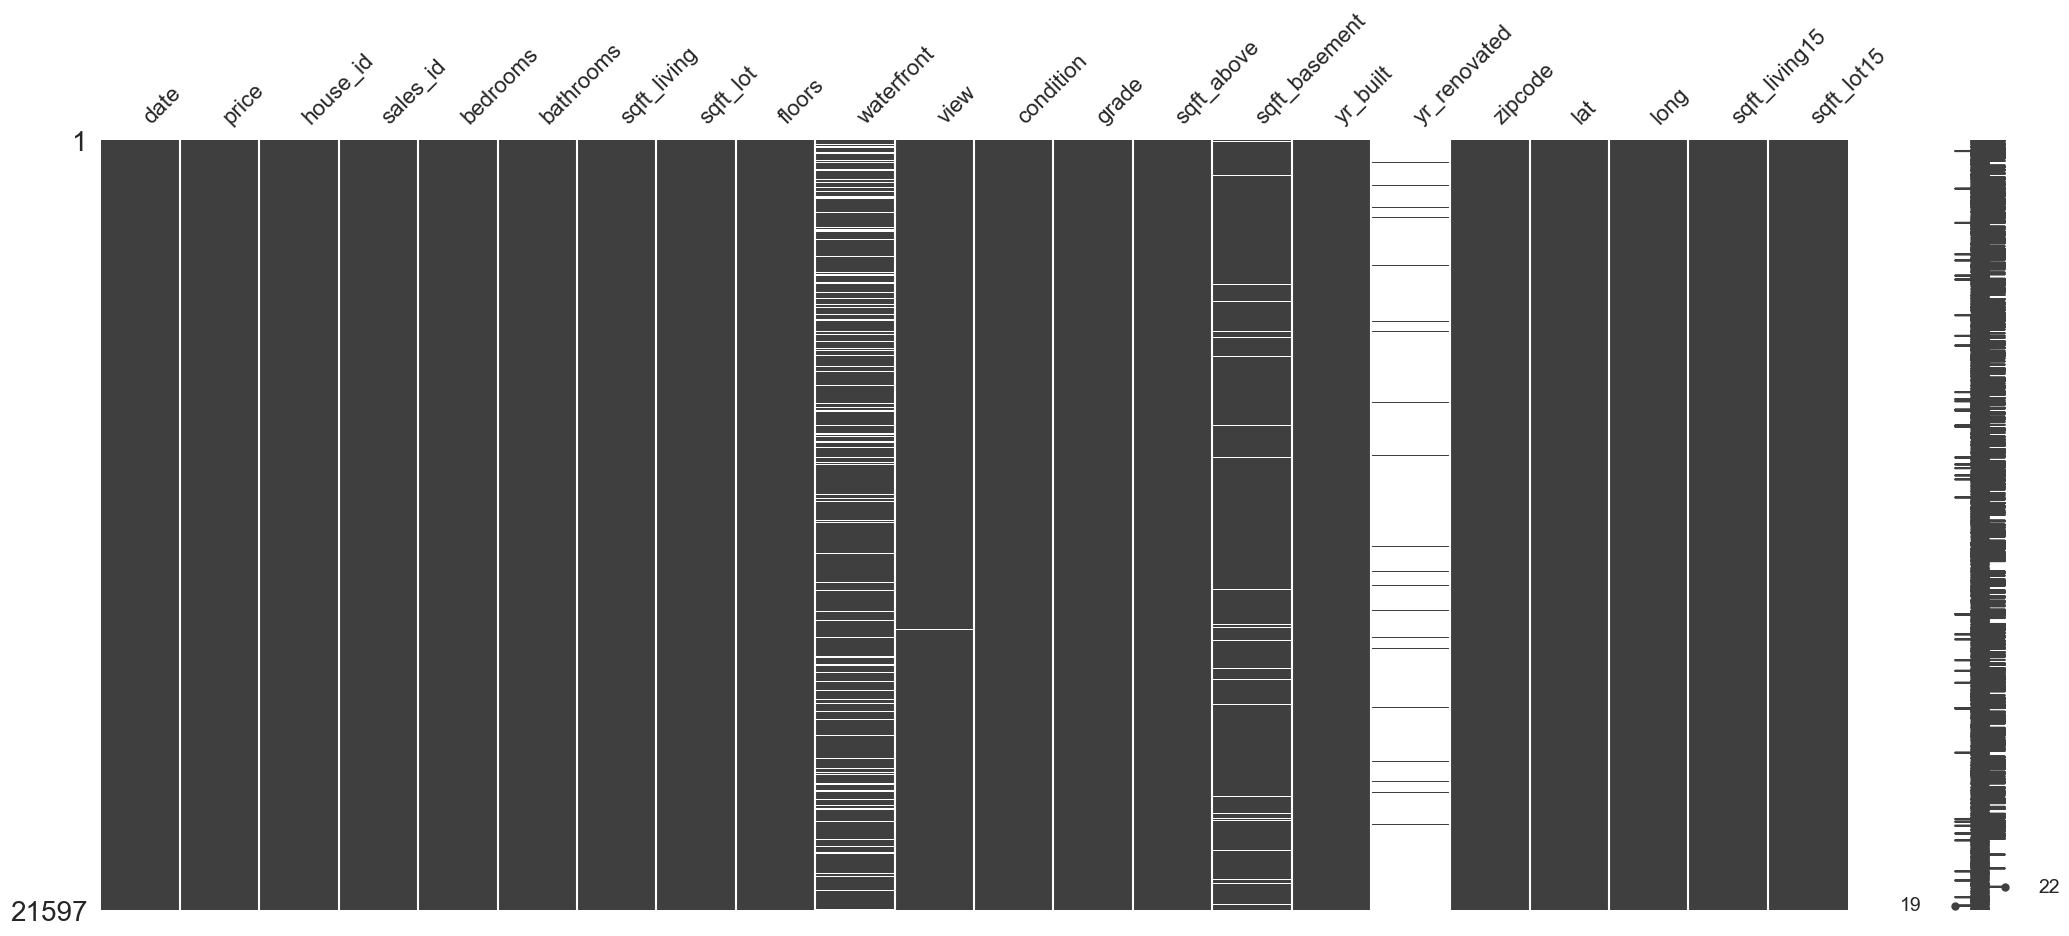

In [81]:
# Checking for missing values
msno.matrix(df)

## Statistical Overview

This section provides a statistical overview of our data. It does so in two ways:

1. Numerical: get a overview of central tendency, dispersion, range and percentiles of our data. 
2. Visual: inspect histograms for each variable to see how the values are distributed.

In [82]:
# Numerical overview
df.describe().transpose().drop("count",axis=1)

,mean,min,25%,50%,75%,max,std
date,2014-10-29 04:20:38.171968512,2014-05-02 00:00:00,2014-07-22 00:00:00,2014-10-16 00:00:00,2015-02-17 00:00:00,2015-05-27 00:00:00,NaN
price,540296.574,78000.000,322000.000,450000.000,645000.000,7700000.000,367368.140
house_id,4580474287.771,1000102.000,2123049175.000,3904930410.000,7308900490.000,9900000190.000,2876735715.748
sales_id,10799.000,1.000,5400.000,10799.000,16198.000,21597.000,6234.661
bedrooms,3.373,1.000,3.000,3.000,4.000,33.000,0.926
bathrooms,2.116,0.500,1.750,2.250,2.500,8.000,0.769
sqft_living,2080.322,370.000,1430.000,1910.000,2550.000,13540.000,918.106
sqft_lot,15099.409,520.000,5040.000,7618.000,10685.000,1651359.000,41412.637
floors,1.494,1.000,1.000,1.500,2.000,3.500,0.540
waterfront,0.008,0.000,0.000,0.000,0.000,1.000,0.087


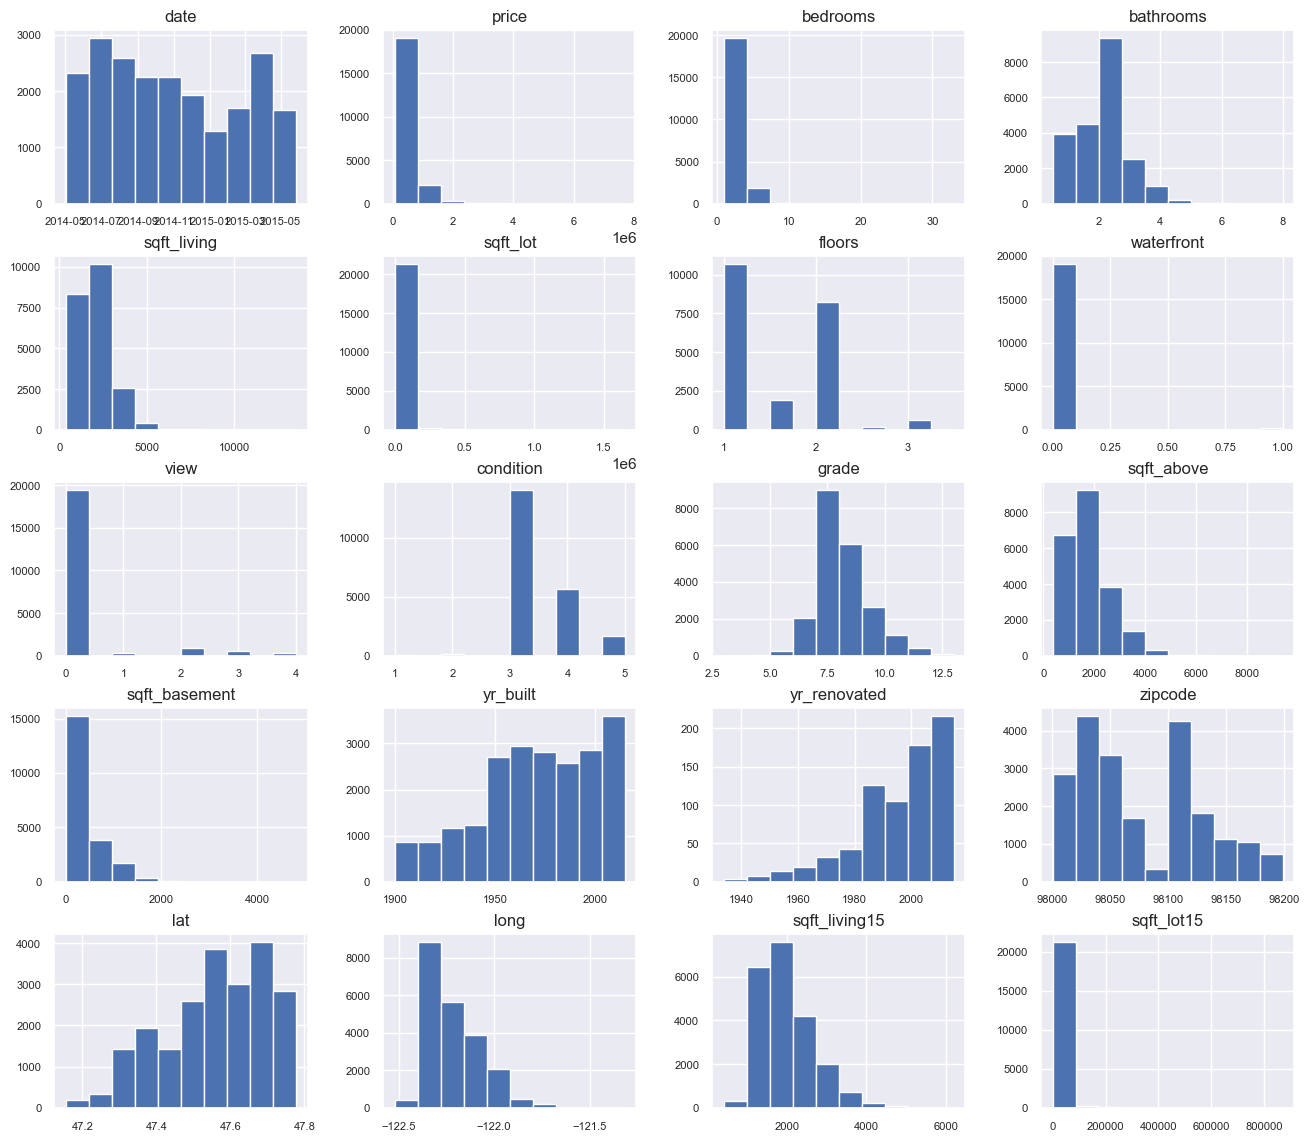

In [83]:
# Visual overview
df.drop(["house_id","sales_id"],axis=1,inplace=False).hist(figsize=(16, 14), xlabelsize=8, ylabelsize=8);

### Correlation with House Price

Our client is very price-sensitive. We would therefore like to find out which variables are correlated with house price. Unsurprisingly, house price is most strongly correlated with:

1. How large the living area of the house is.
2. What grade the house has.
3. The number of bathrooms.
4. The size of the neighbor's houses.

The precise values are shown below.

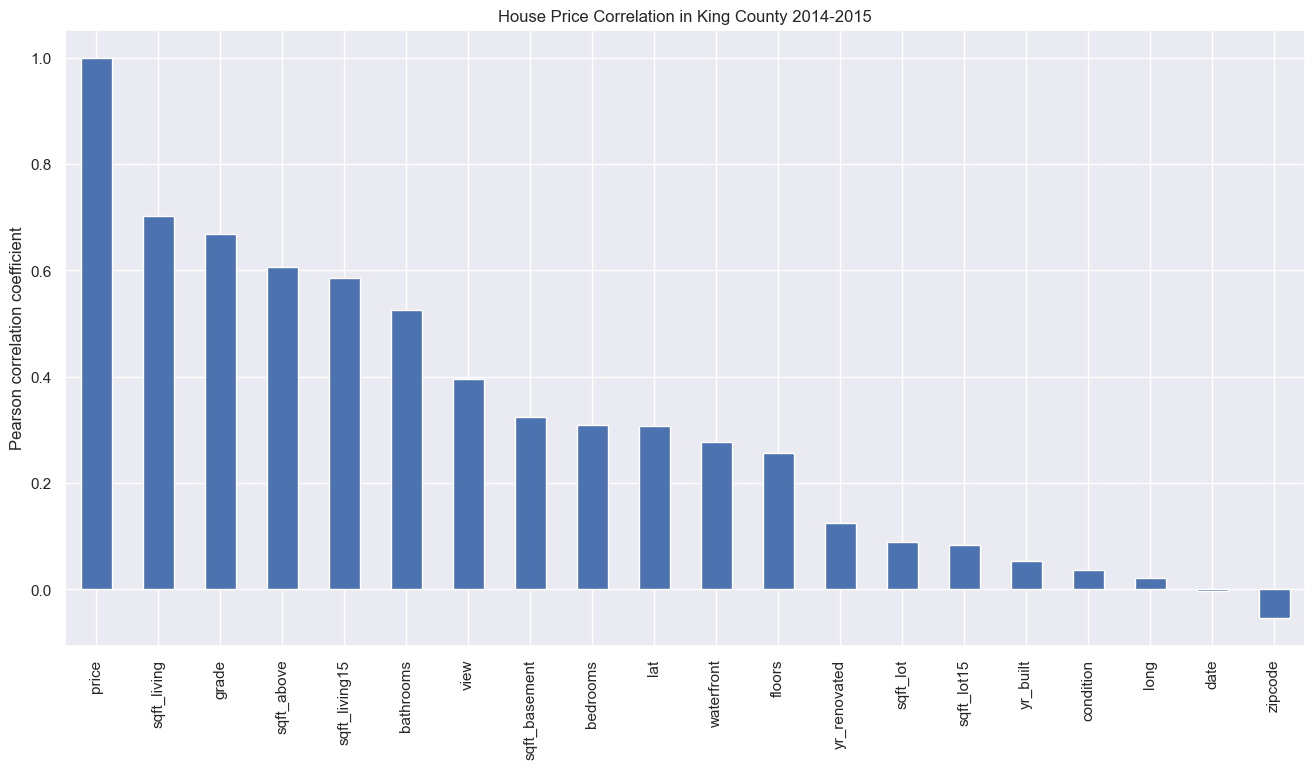

In [84]:
# Correlation matrix
corr_matrix = df.drop(["house_id","sales_id"],axis=1,inplace=False).corr()

# Plotting
ax = corr_matrix["price"].sort_values(ascending=False).plot(kind="bar")
ax.set(ylabel="Pearson correlation coefficient", title="House Price Correlation in King County 2014-2015");

## Client-Focused Data Analysis

This section focuses on helping a fictional client with an investment decision. Here is a brief description of the case:

- Thomas Hansen wants to buy a house
- He has 5 kids
- Is on a very tight budget
- Wants a nice social neighborhood
- Is wondering when and where to buy

Our client recommendations are guided by the following questions:

1. *When* should our client buy?
2. *Where* should our client buy?
3. *What* should our client buy?

And our recommendations will be constrained by two assumptions:

1. A house for 6 people needs *at least* 3 bedrooms and 2 bathrooms.
2. Social neighborhoods with a community spirit are typically characterized by *low fluctuation*.

### When to buy?

As the plots below show, there are two recommendations with respect to market timing:

1. Consider buying in February and try to avoid spring or summer.
2. Go for the middle of the month rather than the beginning or the end.


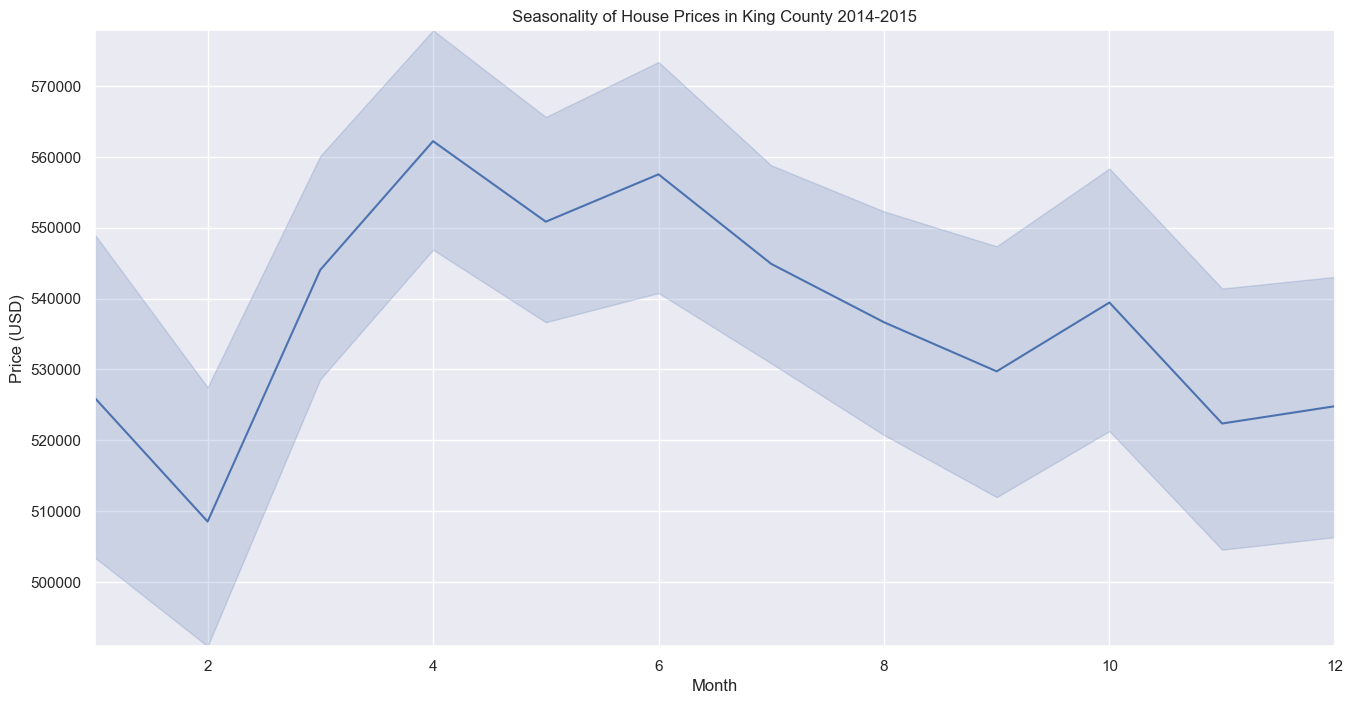

In [85]:
# Checking for seasonality of house prices
ax = sns.lineplot(df, y = "price", x= df['date'].dt.strftime('%m').astype("int"))
ax.set(xlabel='Month', ylabel='Price (USD)', title="Seasonality of House Prices in King County 2014-2015");
ax.margins(0,0)

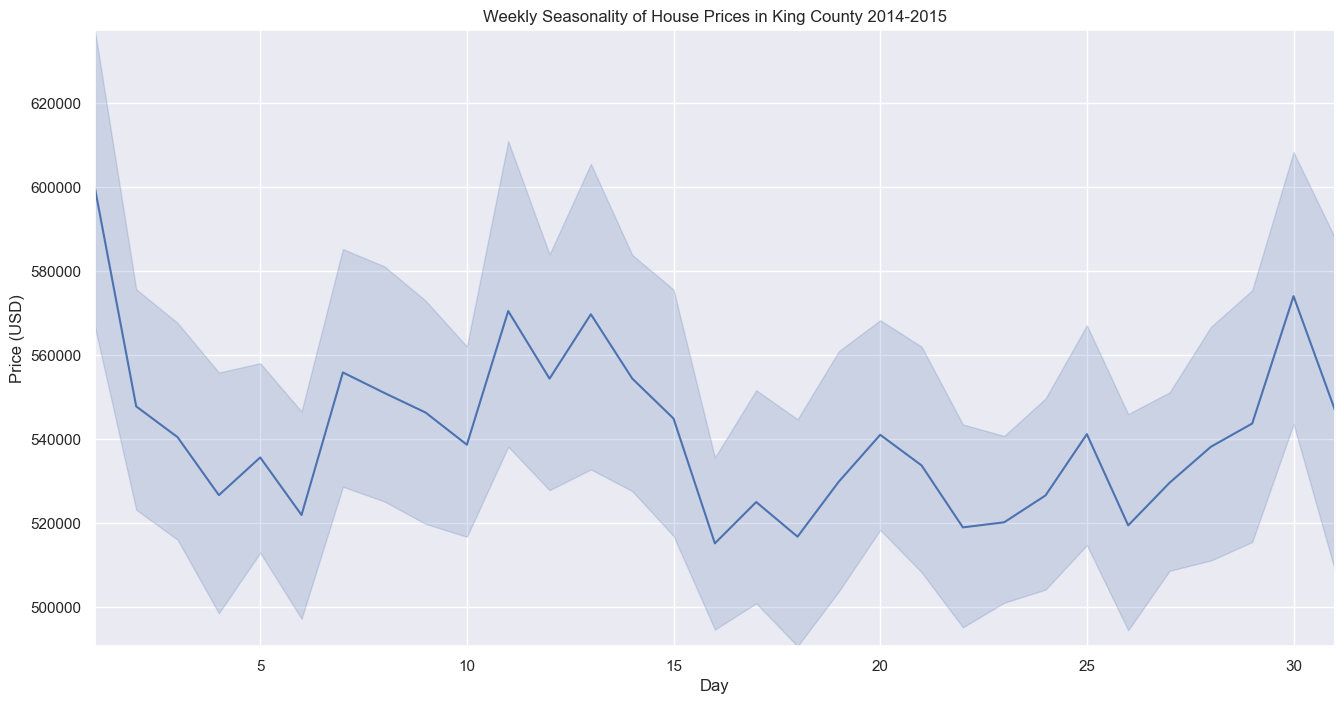

In [86]:
# Checking for weekly seasonality of house prices
ax = sns.lineplot(df, y = "price", x= df['date'].dt.strftime('%d').astype("int"))
ax.set(xlabel='Day', ylabel='Price (USD)', title="Weekly Seasonality of House Prices in King County 2014-2015");
ax.margins(0,0)

### Where to buy?

Since our client is looking for a nice social neighborhood, our recommendation is to look for low-fluctuation neighborhoods. After all, community spirit needs time and trust. Below, the neighborhoods are ranked according to their fluctuation. Our client should try to stick to neighborhoods on the left-hand side.

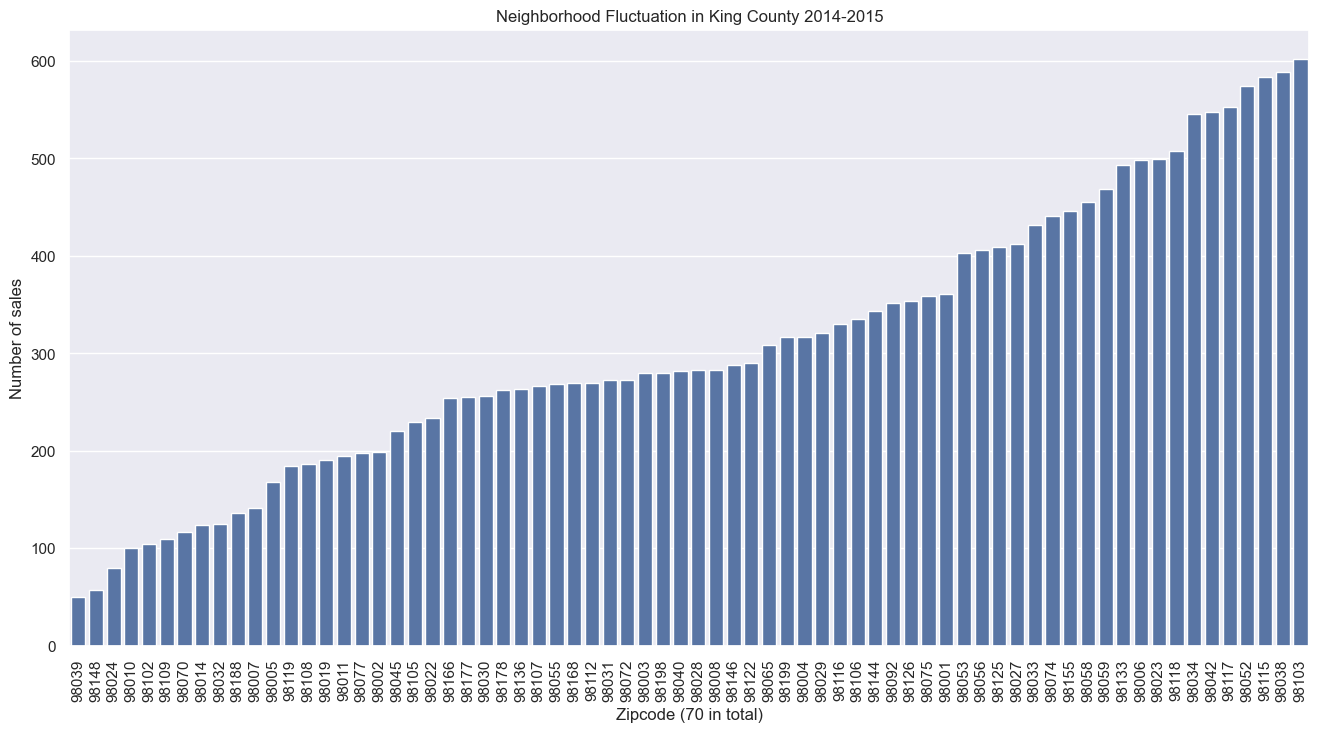

In [87]:
# Grouping by zipcode and sorting by fluctuation
group_by_zip = df.groupby("zipcode")
zipcodes_by_fluctuation = group_by_zip["zipcode"].count().sort_values()

# Create dictionary for mapping
dict(zipcodes_by_fluctuation)
df.insert(0,"zip_fluctuation",df["zipcode"].map(zipcodes_by_fluctuation))

# Plotting
ax = sns.barplot(ax = sns.barplot(y=zipcodes_by_fluctuation, x=zipcodes_by_fluctuation.index.astype("str")))
ax.set(ylabel='Number of sales', xlabel='Zipcode (70 in total)', title="Neighborhood Fluctuation in King County 2014-2015");
ax.xaxis.set_tick_params(rotation=90)

### What to buy?

Instead of buying recommendations, we propose the following methodology for our client:

1. Start with most affordable house with at least 3 bedrooms and 2 bathrooms
2. Ask yourself: would you be willing to pay for a neighborhood lower fluctuation?

Keep in mind that improving the neighborhood might compromise other aspects. The first 5 candidate locations resulting from this method are shown below:

In [88]:
# Filter for houses with at least 3 bedrooms and 2 bathrooms
df_bed_bath = df[(df["bathrooms"]>= 2) & (df["bedrooms"]>=3)]
df_bed_bath_sorted_by_price = df_bed_bath.sort_values("price").head(5)
suggestions = df_bed_bath_sorted_by_price.drop(["date","sales_id","sqft_living15","sqft_lot15"], axis=1)
display(suggestions)

,zip_fluctuation,price,house_id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
15796,507,133000.000,7129304540,5.000,2.000,1430.000,5600.000,1.500,0.000,0.000,3,6,1430.000,0.000,1947,NaN,98118,47.519,-122.266
15130,288,147400.000,1823049182,3.000,2.000,1080.000,9225.000,1.000,0.000,0.000,2,7,1080.000,0.000,1955,NaN,98146,47.484,-122.346
13215,262,150000.000,2976800749,4.000,2.000,1460.000,7254.000,1.000,0.000,0.000,3,6,1460.000,0.000,1959,NaN,98178,47.506,-122.254
15962,361,154000.000,3356403304,3.000,3.000,1530.000,9997.000,1.000,0.000,0.000,3,6,1020.000,510.000,1992,NaN,98001,47.286,-122.252
5402,507,158000.000,7129300595,3.000,2.000,1090.000,6090.000,1.000,0.000,0.000,3,7,940.000,150.000,1940,NaN,98118,47.512,-122.259


Additionally, we provide a geoplot of the 5 candidate locations: https://github.com/jottemka/eda_neuefische/blob/ef8f00f8dba6c665a72b53648f7c0915470c23d3/csv_map.html

In [89]:
# Geoplot

data = suggestions
# Create a map centered around the average latitude and longitude
center_lat = data['lat'].mean()
center_lon = data['long'].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add markers to the map
for _, row in data.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
       # popup=row['name']
    ).add_to(m)

# Save the map to an HTML file
m.save("csv_map.html")

## Conclusion

Interesting data insights:

1. More rooms does mean higher price, but the relationship is not as strong as one might expect.
2. Older houses are not generally cheaper. The correlation is almost zero.
3. Surprisingly, just like agricultural products, house prices exhibit seasonality effects.


Client recommendation, least expensive option:

- House with 15796 in Rainier Beach with 5 bedrooms for 133,000 USD.